## Modelo de Machine Learning para predecir Tiempos de Maraton.

In [39]:
import pandas as pd
#importamos libreria pandas 

In [40]:
#Importamos el archivo csv con el cual vamos a trabajar y lo analizamos de principio.
data  = pd.read_csv("MarathonData.csv")
data

,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY
0,1,Prague17,Blair MORGAN,MAM,132.8,14.434783,NaN,1.16,2.37,A
1,2,Prague17,Robert Heczko,MAM,68.6,13.674419,NaN,1.23,2.59,A
2,3,Prague17,Michon Jerome,MAM,82.7,13.520436,NaN,1.30,2.66,A
3,4,Prague17,Daniel Or lek,M45,137.5,12.258544,NaN,1.32,2.68,A
4,5,Prague17,Luk ? Mr zek,MAM,84.6,13.945055,NaN,1.36,2.74,A
...,...,...,...,...,...,...,...,...,...,...
82,83,Prague17,Stefano Vegliani,M55,50.0,10.830325,NaN,2.02,3.93,D
83,84,Prague17,Andrej Madliak,M40,33.6,10.130653,ciclista 3h,1.94,3.93,D
84,85,Prague17,Yoi Ohsako,M40,55.4,11.043189,NaN,1.94,3.94,D
85,86,Prague17,Simon Dunn,M45,33.2,11.066667,NaN,2.05,3.95,D


In [41]:
#Observamos la cantidad de columnas, datos no nulos existentes , y el tipo de dato ,
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             87 non-null     int64  
 1   Marathon       87 non-null     object 
 2   Name           87 non-null     object 
 3   Category       81 non-null     object 
 4   km4week        87 non-null     float64
 5   sp4week        87 non-null     float64
 6   CrossTraining  13 non-null     object 
 7   Wall21         87 non-null     object 
 8   MarathonTime   87 non-null     float64
 9   CATEGORY       87 non-null     object 
dtypes: float64(3), int64(1), object(6)
memory usage: 6.9+ KB


In [42]:
#La columna 'Wall21', hace referencia a tiempos de carrera, por lo que su Dtype es incorrecto, lo transformo a float64 con la funcion 'pd.to_numeric'
data['Wall21']=pd.to_numeric(data['Wall21'],errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             87 non-null     int64  
 1   Marathon       87 non-null     object 
 2   Name           87 non-null     object 
 3   Category       81 non-null     object 
 4   km4week        87 non-null     float64
 5   sp4week        87 non-null     float64
 6   CrossTraining  13 non-null     object 
 7   Wall21         81 non-null     float64
 8   MarathonTime   87 non-null     float64
 9   CATEGORY       87 non-null     object 
dtypes: float64(4), int64(1), object(5)
memory usage: 6.9+ KB


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'km4week'}>],
       [<AxesSubplot:title={'center':'sp4week'}>,
        <AxesSubplot:title={'center':'Wall21'}>],
       [<AxesSubplot:title={'center':'MarathonTime'}>, <AxesSubplot:>]],
      dtype=object)

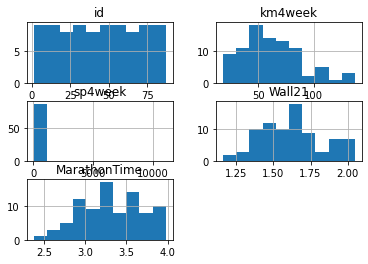

In [43]:
#Solicitamos algunos plots simples para hacer pequeñas visualizaciones, como en este caso observar en el grafico de Marathon Time que son muy pocos corredores quienes la completan en 2.5 horas o menos 
data.hist()

In [44]:
#Depuramos nuestro DataSet de aquellas columns que NO serían en primer termino influyentes a la hora de predecir nuevos tiempos de maraton
data = data.drop(columns = ['Name'])
data = data.drop(columns = ['id' ])
data = data.drop(columns = ['Marathon' ])
data = data.drop(columns = ['CATEGORY'])
data.head()


,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,MAM,132.8,14.434783,NaN,1.16,2.37
1,MAM,68.6,13.674419,NaN,1.23,2.59
2,MAM,82.7,13.520436,NaN,1.30,2.66
3,M45,137.5,12.258544,NaN,1.32,2.68
4,MAM,84.6,13.945055,NaN,1.36,2.74


In [45]:
#Pasamos a la eliminacion/reemplazo de aquellos datos nulos 'NaN'
data.isna().sum()

Category          6
km4week           0
sp4week           0
CrossTraining    74
Wall21            6
MarathonTime      0
dtype: int64

In [46]:
#En este caso, la columna 'CrossTraining' es la que presenta 74 datos NaN, para transformarlos, primero rellenamos tales datos con 0 con la funcion fillna(0)
data['CrossTraining']=data['CrossTraining'].fillna(0)
data

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,MAM,132.8,14.434783,0,1.16,2.37
1,MAM,68.6,13.674419,0,1.23,2.59
2,MAM,82.7,13.520436,0,1.30,2.66
3,M45,137.5,12.258544,0,1.32,2.68
4,MAM,84.6,13.945055,0,1.36,2.74
...,...,...,...,...,...,...
82,M55,50.0,10.830325,0,2.02,3.93
83,M40,33.6,10.130653,ciclista 3h,1.94,3.93
84,M40,55.4,11.043189,0,1.94,3.94
85,M45,33.2,11.066667,0,2.05,3.95


In [47]:
#En el caso de la columna 'Wall21' que presenta 6 datos 'NaN' en esta oportunidad los eliminaremos. Pasaremos de tener 87 rows a solo 81.
data = data.dropna(how = 'any')
data

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,MAM,132.8,14.434783,0,1.16,2.37
1,MAM,68.6,13.674419,0,1.23,2.59
2,MAM,82.7,13.520436,0,1.30,2.66
3,M45,137.5,12.258544,0,1.32,2.68
4,MAM,84.6,13.945055,0,1.36,2.74
...,...,...,...,...,...,...
82,M55,50.0,10.830325,0,2.02,3.93
83,M40,33.6,10.130653,ciclista 3h,1.94,3.93
84,M40,55.4,11.043189,0,1.94,3.94
85,M45,33.2,11.066667,0,2.05,3.95


In [48]:
#Trabajamos con los datos NO NUMERICOS , tales como los que presenta la columna 'CrossTraining' y 'Category'
#CrossTraining = identificamos aquellos valores que integran la columna, para despues traducirlos de alguna forma en valores numericos
data['CrossTraining'].unique()

array([0, 'ciclista 1h', 'ciclista 4h', 'ciclista 13h', 'ciclista 3h',
       'ciclista 5h'], dtype=object)

In [49]:
#Reemplazamos cada uno de los cinco valores posibles de tipo String, por 5 nuevos valores pero de tipo númerico
cross={'CrossTraining': {'ciclista 1h':1,'ciclista 3h':2, 'ciclista 4h':3, 'ciclista 5h':4, 'ciclista 13h':5}}
data.replace(cross, inplace=True)
data

C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,MAM,132.8,14.434783,0,1.16,2.37
1,MAM,68.6,13.674419,0,1.23,2.59
2,MAM,82.7,13.520436,0,1.30,2.66
3,M45,137.5,12.258544,0,1.32,2.68
4,MAM,84.6,13.945055,0,1.36,2.74
...,...,...,...,...,...,...
82,M55,50.0,10.830325,0,2.02,3.93
83,M40,33.6,10.130653,2,1.94,3.93
84,M40,55.4,11.043189,0,1.94,3.94
85,M45,33.2,11.066667,0,2.05,3.95


In [50]:
data['Category'].unique()

array(['MAM', 'M45', 'M40', 'M50', 'M55', 'WAM'], dtype=object)

In [52]:
cat={'Category':{'MAM':1,'M45':2,'M40':3,'M50':4,'M55':5,'WAM':6}}
data.replace(cat, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 0 to 86
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Category       81 non-null     int64  
 1   km4week        81 non-null     float64
 2   sp4week        81 non-null     float64
 3   CrossTraining  81 non-null     int64  
 4   Wall21         81 non-null     float64
 5   MarathonTime   81 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 4.4 KB


C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [53]:
#Importamos la libreria pyplot para ver posibles relaciones a traves de los graficos.
import matplotlib.pyplot as plt

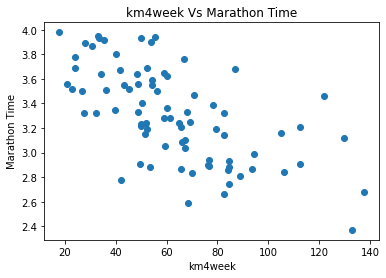

In [54]:
# A traves del scatter plot podemos visualizar, en este caso, una posible relación existente entre la cantidad de km realizados en las ultimas 4 semanas,
#Y la reducción del tiempo de maraton.
plt.scatter(x = data['km4week'], y = data['MarathonTime'])
plt.title('km4week Vs Marathon Time')
plt.xlabel('km4week')
plt.ylabel('Marathon Time')
plt.show()

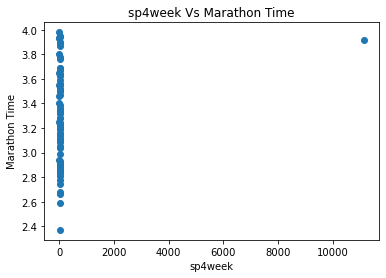

In [55]:
#En este caso de analisis entre sp4week vs Marathon Time, un dato unlier nos desvirtua el analisis de dichar relación, por lo que debe ser eliminado.

plt.scatter(x = data['sp4week'], y = data['MarathonTime'])
plt.title('sp4week Vs Marathon Time')
plt.xlabel('sp4week')
plt.ylabel('Marathon Time')
plt.show()

In [56]:
#Con query, en este caso, me quedo con todos los datos de velocidad menores a mil, para de este modo dejar fuera el unlier y posteriormente volver a graficar.
data = data.query('sp4week<1000')

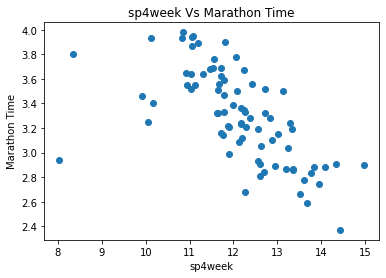

In [57]:
#Eliminado el unlier, se puede observar claramente una nueva relacion, entre la velocidad promedio obtenida en las ultimas 4 semanas y el tiempo de maraton.
plt.scatter(x = data['sp4week'], y = data['MarathonTime'])
plt.title('sp4week Vs Marathon Time')
plt.xlabel('sp4week')
plt.ylabel('Marathon Time')
plt.show()

## ENTRENAMIENTO DEL MODELO DE ML

In [58]:
#Para el entrenamiento de nuestro modelo, tomaremos el 80% de los datos de prueba y el 20 % restante para testear el mismo.
#EMTRENAMIENTO DEL MODELO.

dentrenamiento = data.sample(frac = 0.8, random_state = 0) #80% de los datos
dtest = data.drop(dentrenamiento.index) #dtest seria igual en este caso a restarle a data los valores de dentrenamiento.

In [59]:
#Quedaron 64 rows, un 80 % del total
dentrenamiento

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
54,3,70.7,11.783333,0,1.77,3.47
28,2,51.6,13.008403,0,1.50,3.15
31,1,79.4,13.344538,0,1.60,3.19
84,3,55.4,11.043189,0,1.94,3.94
47,2,39.6,12.247423,0,1.67,3.35
...,...,...,...,...,...,...
55,1,26.9,13.121951,0,1.67,3.50
20,1,94.5,11.886792,0,1.45,2.99
79,1,53.9,11.802920,0,1.98,3.90
8,1,70.0,13.770492,1,1.38,2.83


In [60]:
#Se realiza un pop de la columna a predecir
etiquetas_entrenamiento = dentrenamiento.pop('MarathonTime')
etiquetas_test = dtest.pop('MarathonTime')

In [61]:
#Ahora obtenemos solo los datos de la columna 'MarathonTime'
etiquetas_entrenamiento

54    3.47
28    3.15
31    3.19
84    3.94
47    3.35
      ... 
55    3.50
20    2.99
79    3.90
8     2.83
13    2.88
Name: MarathonTime, Length: 64, dtype: float64

In [63]:
#Ahora intentamos ver nuevamente los valores de 'dentrenamiento' y observamos que ahora la columna 'MarathonTime', ya no esta, porque fue extraida por el .pop
dentrenamiento

,Category,km4week,sp4week,CrossTraining,Wall21
54,3,70.7,11.783333,0,1.77
28,2,51.6,13.008403,0,1.50
31,1,79.4,13.344538,0,1.60
84,3,55.4,11.043189,0,1.94
47,2,39.6,12.247423,0,1.67
...,...,...,...,...,...
55,1,26.9,13.121951,0,1.67
20,1,94.5,11.886792,0,1.45
79,1,53.9,11.802920,0,1.98
8,1,70.0,13.770492,1,1.38


### PRUEBA DEL MODELO DE REGRESION LINEAL


In [64]:
#Importamos el modelo de regresion lineal de sklearn
#A traves de fit, ponemos a entrenar el modelo con los datos de entrenamiento y las etiquetas de entrenamiento(resultados de maraton esperados)

from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(dentrenamiento, etiquetas_entrenamiento)

LinearRegression()

In [65]:
#Testeamos predicciones del modelo y obtendremos un array con los valores predecidos o posibles.
predicciones = modelo.predict(dtest)
predicciones

array([2.79390706, 2.81599412, 3.05747527, 3.0497715 , 3.0601308 ,
       3.29473308, 3.36211907, 3.36226188, 3.17473152, 3.29138286,
       3.37757783, 3.5216523 , 3.5919168 , 3.55016407, 3.66416024,
       3.85281097])

In [66]:
#importamos numpy y mean_squared_error para calcular el error porcentual
#Se comparan las predicciones de nuestro modelo con las etiquetas que nos guardamos (20% restante), para ver si existe un grado de coincidencia entre las mismas.
import numpy as np
from sklearn.metrics import mean_squared_error
error = np.sqrt(mean_squared_error(etiquetas_test, predicciones))
print("Error porcentual: %f" % (error*100))

Error porcentual: 11.030345


In [67]:
#Se obtuvo un 11 % de posibilidad de error del modelo-

In [68]:
# A partir de conocer este % de error, se podrán cargar nuevas consultas de corredores con sus metricas, y tratar de predecir sus tiempos posibles en maraton.
ncorredor = pd.DataFrame(np.array([[1,400,20,0,1.4]]), columns= ['Category', 'km4week','sp4week','CrossTraining','Wall21'])
ncorredor

,Category,km4week,sp4week,CrossTraining,Wall21
0,1.0,400.0,20.0,0.0,1.4


In [69]:
modelo.predict(ncorredor)

array([2.199872])

In [70]:
#Para este nuevo 'ncorredor' la prediccion de su tiempo de maraton es de 2.19 hs segun sus metricas.